### Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [2]:
data = 'data/water_potability.csv'
wp = pd.read_csv(data)
wp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
wp.isna().sum()[wp.isna().sum()>0]

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

In [5]:
wp.ph.isna().sum()/len(wp)

0.14987789987789987

14% de los datos se encuentra nulos.
Veamos la distribución que tienen estos datos para ver que tipo de tratamiento elegimos

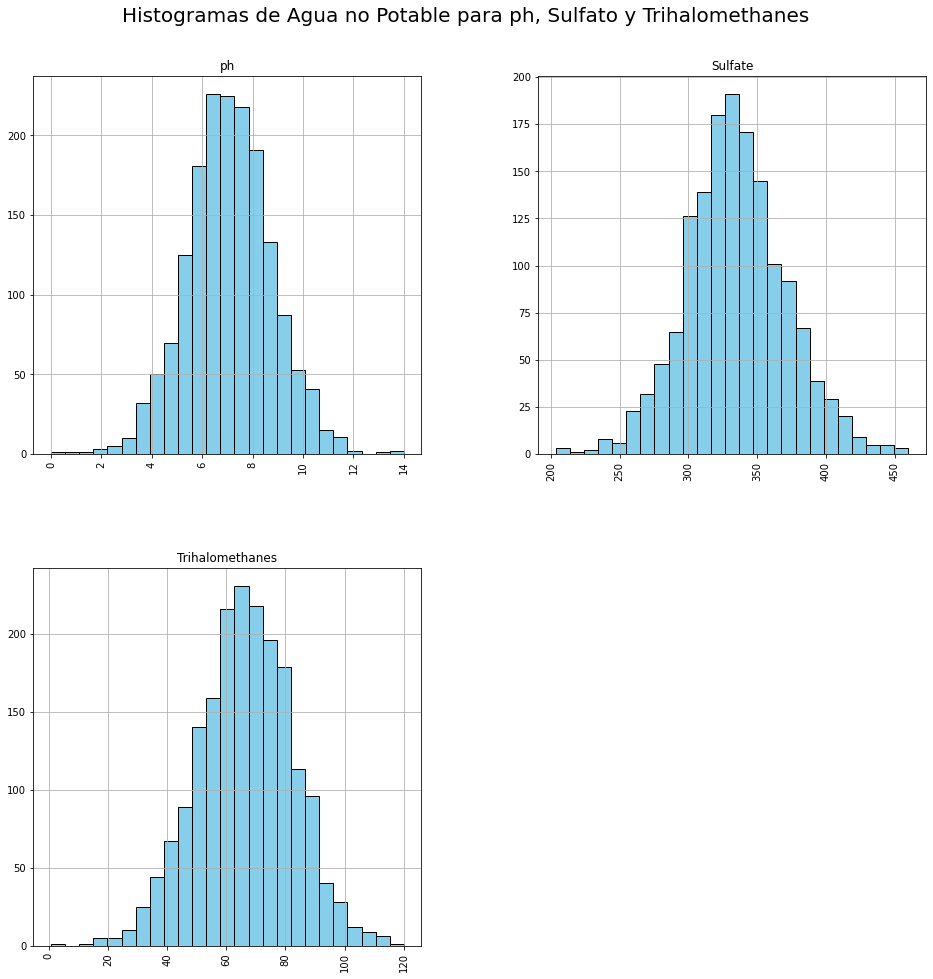

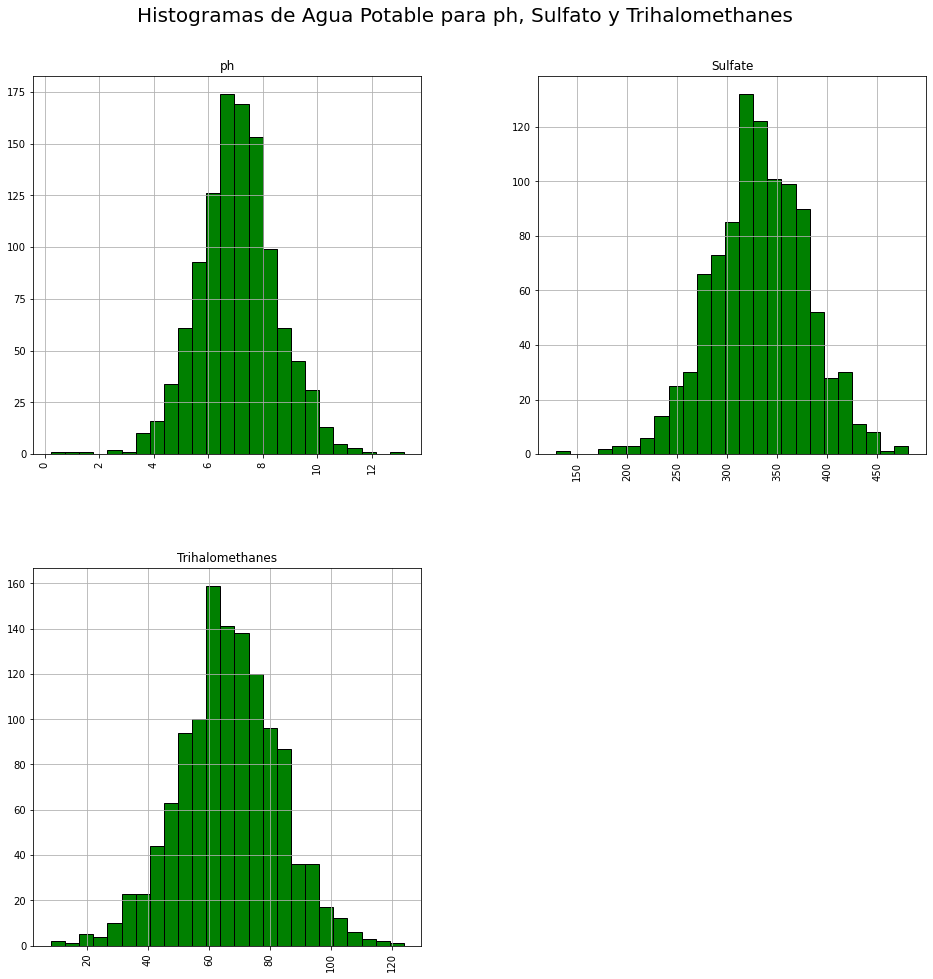

In [6]:
# Histogramas
wp[wp.Potability == 0].loc[:, ['ph', 'Sulfate', 'Trihalomethanes']].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=90,
                 edgecolor='black',
                 color = "skyblue")
plt.suptitle('Histogramas de Agua no Potable para ph, Sulfato y Trihalomethanes', size=20, y=0.94)

wp[wp.Potability == 1].loc[:, ['ph', 'Sulfate', 'Trihalomethanes']].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=90,
                 edgecolor='black',
                 color= 'green')
plt.suptitle('Histogramas de Agua Potable para ph, Sulfato y Trihalomethanes', size=20, y=0.94);


In [7]:
wp[wp.Potability == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1684.0,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.0,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.0,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.0,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.0,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.0,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.0,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.0,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.0,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
wp[wp.Potability == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


En vista que para ambos casos, la media no difiere tanto de la mediana, utilizaremos la mediana de cada característica para reemplazar los datos nulos

In [9]:
mediana_ph = wp.groupby('Potability')['ph'].median()
mediana_sulfato = wp.groupby('Potability')['Sulfate'].median()
mediana_trihalomethanes = wp.groupby('Potability')['Trihalomethanes'].median()

In [10]:
wp.loc[(wp['Potability'] == 0 ) & (wp['ph'].isnull()), 'ph'] =  mediana_ph[0]
wp.loc[(wp['Potability'] == 0 ) & (wp['Sulfate'].isnull()), 'Sulfate'] =  mediana_sulfato[0]
wp.loc[(wp['Potability'] == 0 ) & (wp['Trihalomethanes'].isnull()), 'Trihalomethanes'] =  mediana_trihalomethanes[0]

wp.loc[(wp['Potability'] == 1 ) & (wp['ph'].isnull()), 'ph'] =  mediana_ph[1]
wp.loc[(wp['Potability'] == 1 ) & (wp['Sulfate'].isnull()), 'Sulfate'] =  mediana_sulfato[1]
wp.loc[(wp['Potability'] == 1 ) & (wp['Trihalomethanes'].isnull()), 'Trihalomethanes'] =  mediana_trihalomethanes[1]

In [11]:
# Revisamos
wp.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

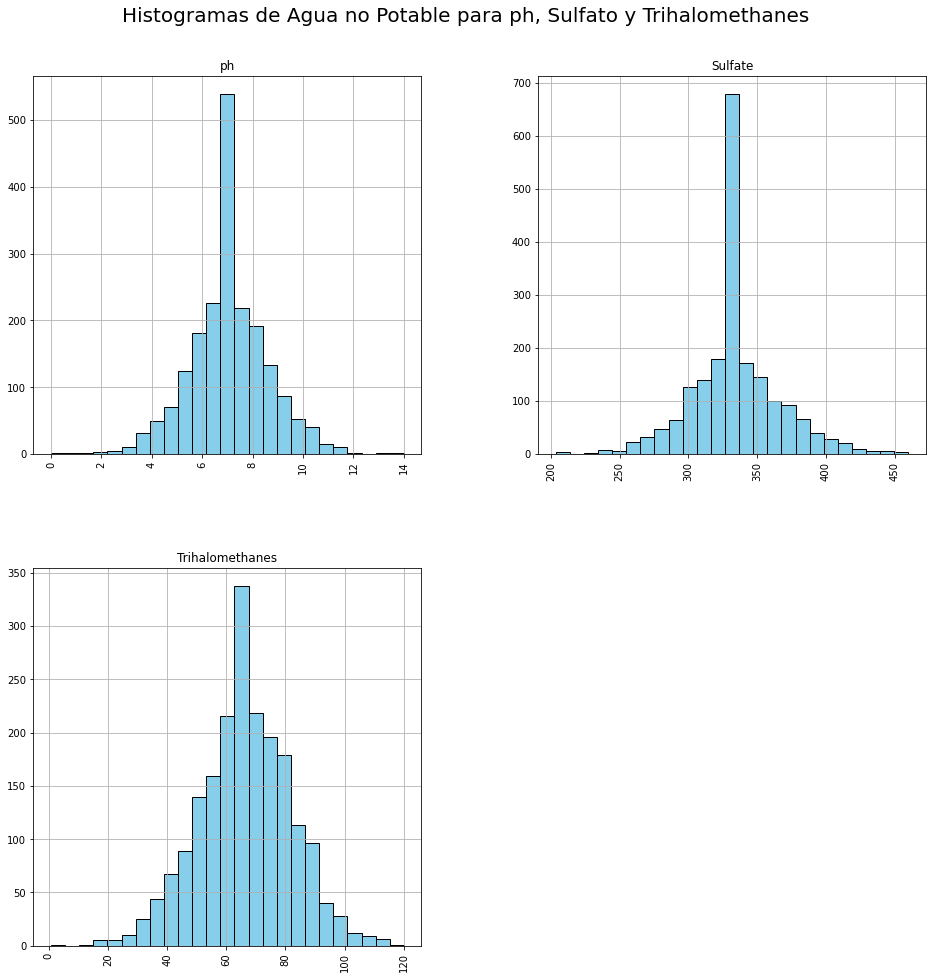

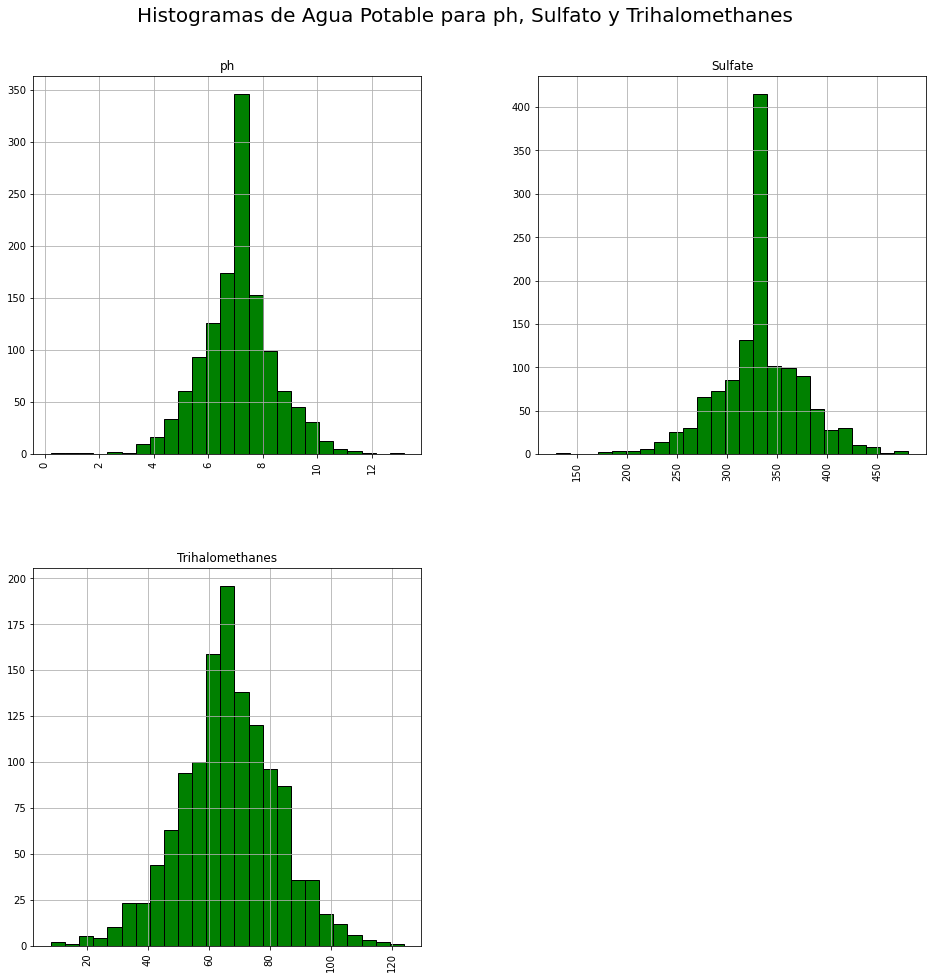

In [12]:
# Histogramas
wp[wp.Potability == 0].loc[:, ['ph', 'Sulfate', 'Trihalomethanes']].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=90,
                 edgecolor='black',
                 color = "skyblue")
plt.suptitle('Histogramas de Agua no Potable para ph, Sulfato y Trihalomethanes', size=20, y=0.94)

wp[wp.Potability == 1].loc[:, ['ph', 'Sulfate', 'Trihalomethanes']].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=90,
                 edgecolor='black',
                 color= 'green')
plt.suptitle('Histogramas de Agua Potable para ph, Sulfato y Trihalomethanes', size=20, y=0.94);

Distribucion de los datos según potabilidad o no

/Users/gillanes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


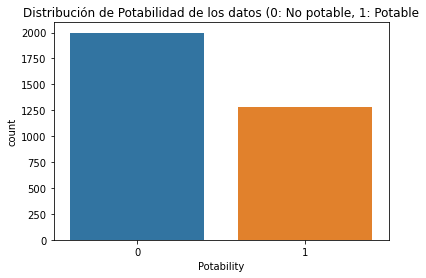

In [13]:
wp.Potability.value_counts()
sns.countplot("Potability",data=wp)
plt.title('Distribución de Potabilidad de los datos (0: No potable, 1: Potable');

In [14]:
print('Potability', np.unique(wp['Potability']))
print(wp.Potability.value_counts())

Potability [0 1]
0    1998
1    1278
Name: Potability, dtype: int64


In [15]:
X = wp.drop(columns='Potability')
y = wp['Potability'].values

In [16]:
print(X.shape)
print(y.shape)

(3276, 9)
(3276,)


In [17]:
# Dividimos nuestro set de datos en entrenamiento y testeo (75% a entrenamiento y 25% a testeo)
# Estratificamos para asegurar una proporcion de datos correcta de Potabilidad tipo 0 y tipo 1
# Se usará como semillas de aleatoriedad el número 42
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.25, 
                                                   random_state=42, 
                                                   stratify=y)

In [18]:
# Estandarizando nuestros datos
scaler = StandardScaler()
# Recordar que solo ajustamos el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicamos transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Probando modelos

In [59]:
# Regresion Logistica L2
lr_accuracies = []
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]

for c in c_values:
    for solver in solvers:
        lr = LogisticRegression(C=c, solver=solver, max_iter=10000)
        lr.fit(X_train, y_train)
        score = lr.score(X_test, y_test)
        lr_accuracies.append(dict(score=score, solver=solver, c=c))

lr_accuracies


[{'score': 0.6105006105006106, 'solver': 'newton-cg', 'c': 1000},
 {'score': 0.6105006105006106, 'solver': 'lbfgs', 'c': 1000},
 {'score': 0.6105006105006106, 'solver': 'liblinear', 'c': 1000},
 {'score': 0.6105006105006106, 'solver': 'newton-cg', 'c': 100},
 {'score': 0.6105006105006106, 'solver': 'lbfgs', 'c': 100},
 {'score': 0.6105006105006106, 'solver': 'liblinear', 'c': 100},
 {'score': 0.6105006105006106, 'solver': 'newton-cg', 'c': 10},
 {'score': 0.6105006105006106, 'solver': 'lbfgs', 'c': 10},
 {'score': 0.6105006105006106, 'solver': 'liblinear', 'c': 10},
 {'score': 0.6105006105006106, 'solver': 'newton-cg', 'c': 1.0},
 {'score': 0.6105006105006106, 'solver': 'lbfgs', 'c': 1.0},
 {'score': 0.6105006105006106, 'solver': 'liblinear', 'c': 1.0},
 {'score': 0.6105006105006106, 'solver': 'newton-cg', 'c': 0.1},
 {'score': 0.6105006105006106, 'solver': 'lbfgs', 'c': 0.1},
 {'score': 0.6105006105006106, 'solver': 'liblinear', 'c': 0.1},
 {'score': 0.6105006105006106, 'solver': 'new

In [51]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))
print(classification_report(y_test,lr.predict(X_test), zero_division=0))

Training accuracy: 0.6096866096866097
Test accuracy: 0.6105006105006106
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       500
           1       0.00      0.00      0.00       319

    accuracy                           0.61       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.37      0.61      0.46       819



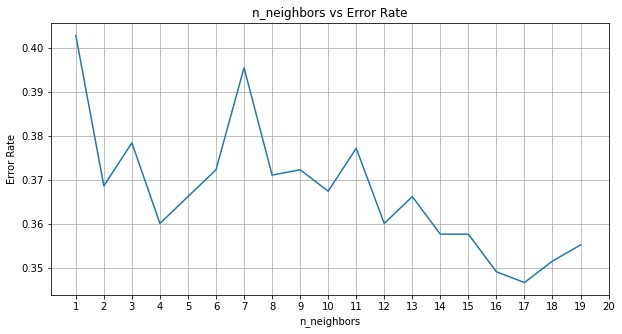

In [25]:
# KNN
# Buscamos la cantidad de vecinos que minimice el RMSE
error_rate = []
K_range = [1] + list(range(2,20,1))
for K in K_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    #error = mean_absolute_error(y_test, preds)
    error_rate.append(np.mean(preds != y_test))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5));
axes.plot(K_range, error_rate);
axes.set_xlabel('n_neighbors', fontsize =10);
axes.set_ylabel('Error Rate', fontsize = 10);
axes.grid()
plt.xticks(np.arange(1, 21, 1.0))
plt.title('n_neighbors vs Error Rate');

In [26]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))
print(classification_report(y_test,knn.predict(X_test)))

Training accuracy: 0.6931216931216931
Test accuracy: 0.6532356532356532
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       500
           1       0.65      0.24      0.35       319

    accuracy                           0.65       819
   macro avg       0.65      0.58      0.55       819
weighted avg       0.65      0.65      0.60       819



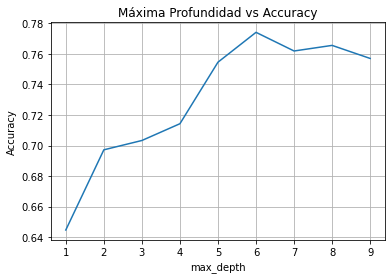

In [27]:
# Árobles de Decisión
# Lista de valores para probar max_depth:
max_depth_range = list(range(1, 10))
# Lista para almacenar el RMSE promedio para cada valor de max_depth:
accuracy = []
for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    accuracy.append(score)

# Visualizar qué max_depth conduce a la mayor accuracy
plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Máxima Profundidad vs Accuracy');

In [28]:
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
print('Training accuracy:', dt.score(X_train, y_train))
print('Test accuracy:', dt.score(X_test, y_test))
print(classification_report(y_test,dt.predict(X_test)))

Training accuracy: 0.818070818070818
Test accuracy: 0.7741147741147741
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       500
           1       0.82      0.54      0.65       319

    accuracy                           0.77       819
   macro avg       0.79      0.73      0.74       819
weighted avg       0.78      0.77      0.76       819



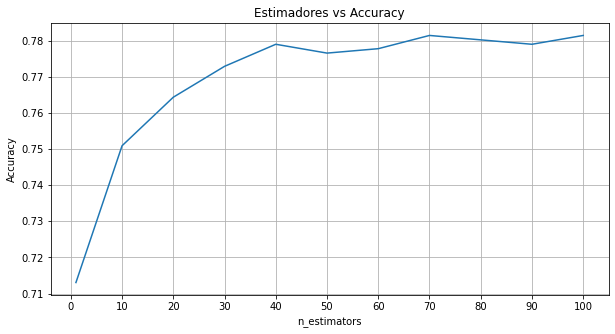

In [52]:
#Random Forest
# Rango de Estimadores
estimator_range = [1] + list(range(10, 101, 10))
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
    rf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=42,
                                 bootstrap=True,
                                 oob_score=False)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =10);
axes.set_ylabel('Accuracy', fontsize = 10);
plt.title('Estimadores vs Accuracy')
plt.xticks(np.arange(0, 101, 10))
axes.grid();

In [33]:
rf = RandomForestClassifier(n_estimators=70,
                             bootstrap=True,
                             oob_score=True,
                             random_state=42)
rf.fit(X_train, y_train)
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))
print('OOB score:', rf.oob_score_)
print(classification_report(y_test,rf.predict(X_test)))

Training accuracy: 1.0
Test accuracy: 0.7814407814407814
OOB score: 0.7891737891737892
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       500
           1       0.79      0.59      0.68       319

    accuracy                           0.78       819
   macro avg       0.79      0.75      0.76       819
weighted avg       0.78      0.78      0.77       819



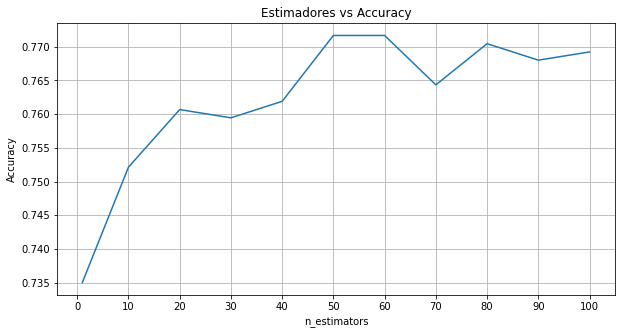

In [53]:
# Bagged Tree
# Rango de Estimadores
estimator_range = [1] + list(range(10, 101, 10))
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
    bt = BaggingClassifier(n_estimators=estimator,
                                 random_state=42,
                                 bootstrap=True,
                                 oob_score=False)
    bt.fit(X_train, y_train)
    scores.append(bt.score(X_test, y_test))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =10);
axes.set_ylabel('Accuracy', fontsize = 10);
axes.grid()
plt.xticks(np.arange(0, 101, 10))
plt.title('Estimadores vs Accuracy');

In [35]:
bt = BaggingClassifier(n_estimators=50,
                             bootstrap=True,
                             oob_score=True,
                             random_state=42)
bt.fit(X_train, y_train)
print('Training accuracy:', bt.score(X_train, y_train))
print('Test accuracy:', bt.score(X_test, y_test))
print('OOB score:', bt.oob_score_)
print(classification_report(y_test,bt.predict(X_test)))

Training accuracy: 1.0
Test accuracy: 0.7716727716727717
OOB score: 0.7867317867317868
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.76      0.60      0.67       319

    accuracy                           0.77       819
   macro avg       0.77      0.74      0.75       819
weighted avg       0.77      0.77      0.77       819



In [36]:
# Regresion Logistica L1
lr1_accuracies = []
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]

for c in c_values:
    lr1 = LogisticRegression(C=c, solver='liblinear', penalty='l1')
    lr1.fit(X_train, y_train)
    score = lr1.score(X_test, y_test)
    lr1_accuracies.append(dict(score=score, c=c))

lr1_accuracies

[{'score': 0.6105006105006106, 'c': 1000},
 {'score': 0.6105006105006106, 'c': 100},
 {'score': 0.6105006105006106, 'c': 10},
 {'score': 0.6105006105006106, 'c': 1.0},
 {'score': 0.6105006105006106, 'c': 0.1},
 {'score': 0.6105006105006106, 'c': 0.01}]

In [50]:
lr1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr1.fit(X_train, y_train)
print('Training accuracy:', lr1.score(X_train, y_train))
print('Test accuracy:', lr1.score(X_test, y_test))
print(classification_report(y_test,lr1.predict(X_test), zero_division=0))

Training accuracy: 0.6096866096866097
Test accuracy: 0.6105006105006106
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       500
           1       0.00      0.00      0.00       319

    accuracy                           0.61       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.37      0.61      0.46       819



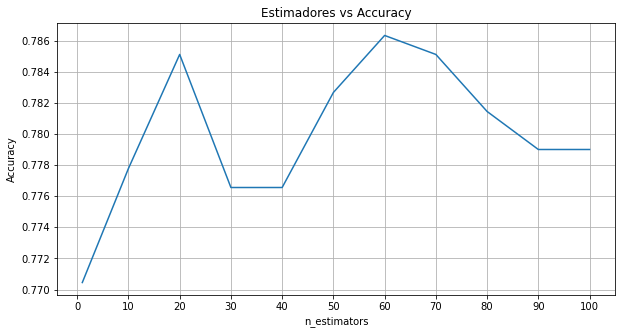

In [45]:
# XGBoost
# Rango de Estimadores
estimator_range = [1] + list(range(10, 101, 10))
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
    xgb = XGBClassifier(n_estimators=estimator,
                                 random_state=42,
                                 use_label_encoder=False,
                                 eval_metric='logloss')
    xgb.fit(X_train, y_train)
    scores.append(xgb.score(X_test, y_test))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =10);
axes.set_ylabel('Accuracy', fontsize = 10);
axes.grid()
plt.xticks(np.arange(0, 101, 10))
plt.title('Estimadores vs Accuracy');

In [58]:
xgb = XGBClassifier(n_estimators=60, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
print('Training accuracy:', xgb.score(X_train, y_train))
print('Test accuracy:', xgb.score(X_test, y_test))
print(classification_report(y_test,xgb.predict(X_test)))

Training accuracy: 0.9955229955229955
Test accuracy: 0.7863247863247863
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.78      0.63      0.70       319

    accuracy                           0.79       819
   macro avg       0.78      0.76      0.77       819
weighted avg       0.79      0.79      0.78       819



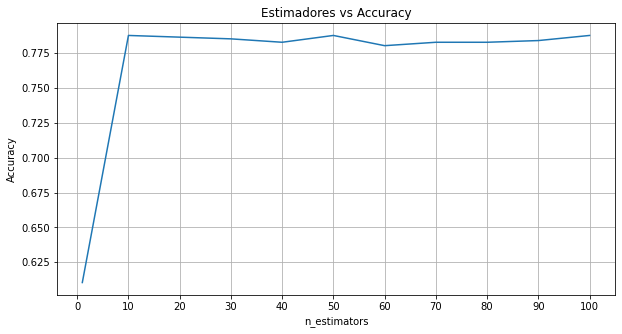

In [63]:
# LightGBM
# Rango de Estimadores
estimator_range = [1] + list(range(10, 101, 10))
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
for estimator in estimator_range:
    lgbm = LGBMClassifier(n_estimators=estimator,
                                 random_state=42)
    lgbm.fit(X_train, y_train)
    scores.append(lgbm.score(X_test, y_test))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =10);
axes.set_ylabel('Accuracy', fontsize = 10);
axes.grid()
plt.xticks(np.arange(0, 101, 10))
plt.title('Estimadores vs Accuracy');

In [64]:
lgbm = LGBMClassifier(n_estimators=10, random_state=42)
lgbm.fit(X_train, y_train)
print('Training accuracy:', lgbm.score(X_train, y_train))
print('Test accuracy:', lgbm.score(X_test, y_test))
print(classification_report(y_test,lgbm.predict(X_test)))

Training accuracy: 0.8445258445258446
Test accuracy: 0.7875457875457875
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       500
           1       0.86      0.55      0.67       319

    accuracy                           0.79       819
   macro avg       0.81      0.74      0.76       819
weighted avg       0.80      0.79      0.77       819



In [65]:
indice = ['Regresión Logística - L2',
          'KNN',
          'Árboles de Decisión',
          'Random Forest',
          'Bagged Tree',
          'Regresión Logística - L1',
          'XGBoost',
          'LightGBM']
indicadores = {'Accuracy' : [accuracy_score(y_test, lr.predict(X_test)),
                             accuracy_score(y_test, knn.predict(X_test)),
                             accuracy_score(y_test, dt.predict(X_test)),
                             accuracy_score(y_test, rf.predict(X_test)),
                             accuracy_score(y_test, bt.predict(X_test)),
                             accuracy_score(y_test, lr1.predict(X_test)),
                             accuracy_score(y_test, xgb.predict(X_test)),
                             accuracy_score(y_test, lgbm.predict(X_test))],
                'Recall' :  [recall_score(y_test, lr.predict(X_test)),
                             recall_score(y_test, knn.predict(X_test)),
                             recall_score(y_test, dt.predict(X_test)),
                             recall_score(y_test, rf.predict(X_test)),
                             recall_score(y_test, bt.predict(X_test)),
                             recall_score(y_test, lr1.predict(X_test)),
                             recall_score(y_test, xgb.predict(X_test)),
                             recall_score(y_test, lgbm.predict(X_test))],
                'Precision': [precision_score(y_test, lr.predict(X_test), zero_division=0),
                             precision_score(y_test, knn.predict(X_test)),
                             precision_score(y_test, dt.predict(X_test)),
                             precision_score(y_test, rf.predict(X_test)),
                             precision_score(y_test, bt.predict(X_test)),
                             precision_score(y_test, lr1.predict(X_test), zero_division=0),
                             precision_score(y_test, xgb.predict(X_test)),
                             precision_score(y_test, lgbm.predict(X_test))],
                'F1'     :  [f1_score(y_test, lr.predict(X_test)),
                             f1_score(y_test, knn.predict(X_test)),
                             f1_score(y_test, dt.predict(X_test)),
                             f1_score(y_test, rf.predict(X_test)),
                             f1_score(y_test, bt.predict(X_test)),
                             f1_score(y_test, lr1.predict(X_test)),
                             f1_score(y_test, xgb.predict(X_test)),
                             f1_score(y_test, lgbm.predict(X_test))]
                             }

resumen = pd.DataFrame(indicadores, index=indice)
resumen

,Accuracy,Recall,Precision,F1
Regresión Logística - L2,0.610501,0.000000,0.000000,0.000000
KNN,0.653236,0.235110,0.652174,0.345622
Árboles de Decisión,0.774115,0.536050,0.822115,0.648956
Random Forest,0.781441,0.586207,0.799145,0.676311
Bagged Tree,0.769231,0.598746,0.757937,0.669002
Regresión Logística - L1,0.610501,0.000000,0.000000,0.000000
XGBoost,0.786325,0.633229,0.776923,0.697755
LightGBM,0.787546,0.545455,0.857143,0.666667


Comparando los indicadores obtenedios por cada uno de los modelos, se elige como el mejor modelo el XGBoost, considerando el puntaje de Recall que tiene, que indica que el modelo clasifica al 63,3% de las fuentes de agua potable de forma correcta. En cuanto al accuracy 78,6% de las fuentes de agua fue clasificado de manera correcta, en cuanto si son o no fuentes de agua potable.

Por otro lado, el valor de Precision, indica que el 77,6% de las fuentes de agua clasificadas como potables están clasificadas de forma correcta.

Ahora obtendremos la matriz de confusión en base a este modelo para obtener la especificidad

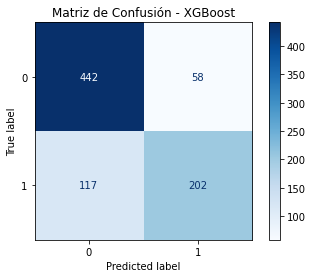

In [66]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, xgb.predict(X_test)).ravel()
plot_confusion_matrix(xgb, X_test, y_test, cmap = 'Blues');
plt.title('Matriz de Confusión - XGBoost');

In [67]:
specificity = tn/(tn+fp)
specificity

0.884

Al calcular la especificidad, esta tiene un valor del 0.884, lo que quiere decir que el 88.4% de las fuentes de agua clasificadas como no potables, fueron clasificadas de forma correcta.

Por todo lo anterior, el modelo escogido es XGBoost.